In [1]:
import os, sys
if os.path.exists("./src"):
    directory_to_prepend = os.path.abspath("./src")
else:
    raise RuntimeError("'src' is not in path")

print(f"-> src path found in: '{directory_to_prepend}")

if directory_to_prepend not in sys.path:
    sys.path = [directory_to_prepend] + sys.path

-> src path found in: '/Users/sofialuk/sampled-hnn/Sampling-HNNs/src


In [2]:
from joblib import load
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from experiment import SampledExperiment, SampledModels
from model.s_hnn import S_HNN
from model.s_mlp import S_MLP

COLOR_TRUTH = '#000000'
COLOR_ELM = '#05c9ff' # blue
COLOR_USWIM = '#ff0000' # red
COLOR_ASWIM = '#28fa02' # green
COLOR_SWIM = '#ffff00' # yellow

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

# scaling params
NETWORK_WIDTHS = range(500, 10500, 500) # [500,1000,...10000]

def get_experiment_results():    
    error_means = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_lows  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_highs = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_means  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_lows   = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_highs  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }

    for n in NETWORK_WIDTHS:
        experiment: SampledExperiment = load(f"experiments/double-pendulum/experiment_hidden_{n}.pkl")
        
        error_means["elm"].append(np.mean(experiment.results.elm_test_H_errors))
        error_lows["elm"].append(np.min(experiment.results.elm_test_H_errors))
        error_highs["elm"].append(np.max(experiment.results.elm_test_H_errors))
        time_means["elm"].append(np.mean(experiment.results.elm_train_times))
        time_lows["elm"].append(np.min(experiment.results.elm_train_times))
        time_highs["elm"].append(np.max(experiment.results.elm_train_times))

        error_means["uswim"].append(np.mean(experiment.results.uswim_test_H_errors))
        error_lows["uswim"].append(np.min(experiment.results.uswim_test_H_errors))
        error_highs["uswim"].append(np.max(experiment.results.uswim_test_H_errors))
        time_means["uswim"].append(np.mean(experiment.results.uswim_train_times))
        time_lows["uswim"].append(np.min(experiment.results.uswim_train_times))
        time_highs["uswim"].append(np.max(experiment.results.uswim_train_times))

        error_means["aswim"].append(np.mean(experiment.results.aswim_test_H_errors))
        error_lows["aswim"].append(np.min(experiment.results.aswim_test_H_errors))
        error_highs["aswim"].append(np.max(experiment.results.aswim_test_H_errors))
        time_means["aswim"].append(np.mean(experiment.results.aswim_train_times))
        time_lows["aswim"].append(np.min(experiment.results.aswim_train_times))
        time_highs["aswim"].append(np.max(experiment.results.aswim_train_times))

        error_means["swim"].append(np.mean(experiment.results.swim_test_H_errors))
        error_lows["swim"].append(np.min(experiment.results.swim_test_H_errors))
        error_highs["swim"].append(np.max(experiment.results.swim_test_H_errors))
        time_means["swim"].append(np.mean(experiment.results.swim_train_times))
        time_lows["swim"].append(np.min(experiment.results.swim_train_times))
        time_highs["swim"].append(np.max(experiment.results.swim_train_times))

    return error_means, error_lows, error_highs, time_means, time_lows, time_highs

In [3]:
# overview of the domain params and model params of the double pendulum experiments
experiment: SampledExperiment = load("experiments/double-pendulum/experiment_hidden_5000.pkl")
print("Double pendulum experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

Double pendulum experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.double_pendulum.DoublePendulum object at 0x1123affd0>, q_lims=[[-3.141592653589793, 3.141592653589793], [-3.141592653589793, 3.141592653589793]], p_lims=[[-1.0, 1.0], [-1.0, 1.0]], train_size=20000, test_size=20000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<ActivationType.TANH: 'tanh'>, network_width=5000, resample_duplicates=True, rcond=1e-13, elm_bias_start=-3.141592653589793, elm_bias_end=3.141592653589793, start_model_random_seed=992472)
-----------------------------------------


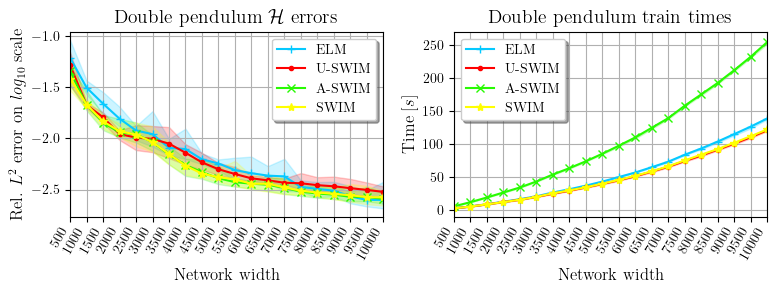

In [4]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8,5*golden_ratio), dpi=100)

# left plot (error)
error_means, error_lows, error_highs, time_means, time_lows, time_highs = get_experiment_results()

ax1.set_title(r"Double pendulum $\mathcal{H}$ errors")
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(NETWORK_WIDTHS)
ax1.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right")
ax1.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax1.set_xlabel(r"Network width")
ax1.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax1.grid()

# right plot (train times)

ax2.set_title(r"Double pendulum train times")
ax2.plot(NETWORK_WIDTHS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax2.plot(NETWORK_WIDTHS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax2.plot(NETWORK_WIDTHS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax2.plot(NETWORK_WIDTHS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(NETWORK_WIDTHS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(NETWORK_WIDTHS)
ax2.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right")
ax2.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax2.set_xlabel(r"Network width")
ax2.set_ylabel(r"Time $[s]$")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax2.grid()

fig.tight_layout()
fig.savefig("plots/double-pendulum-fig.pdf")

In [5]:
# Analyze the error at network width 5000
error_means, _, _, time_means, _, _ = get_experiment_results()
print("Errors at network width 5000")
index = 9 # network width 5000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") 
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Mean train times at network width 5000")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 5000
ELM    :  5.69E-03
U-SWIM :  5.00E-03
A-SWIM :  4.08E-03
SWIM   :  4.18E-03
----------------
Mean train times at network width 5000
ELM    :  43.1
U-SWIM :  39.6
A-SWIM :  85.2
SWIM   :  40.0


In [6]:
# Train a traditional network for comparison for the larger domain

from data import get_train_test_set
from hamiltonian.double_pendulum import DoublePendulum
from activation import ActivationType
from model.hnn import HNN
from trainer.sampler import Sampler
from trainer.traditional_trainer import TraditionalTrainer
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from time import time 
import torch

experiment: SampledExperiment = load(f"experiments/double-pendulum/experiment_hidden_5000.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

double_pendulum = DoublePendulum()

torch.set_default_dtype(torch.float64)

print("-> setting up domain")
train_set, test_set = get_train_test_set(2, double_pendulum, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( ((train_inputs, _), train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set

print("-> training a traditional HNN")
hnn = HNN(input_dim=4, hidden_dim=model_params.network_width, activation=ActivationType.TANH, random_seed=model_params.start_model_random_seed)

total_steps = 180000
batch_size = 2048
learning_rate = 1e-04
weight_decay = 1e-13

traditional_trainer = TraditionalTrainer(total_steps, batch_size, learning_rate, weight_decay, DeviceType.GPU)

time_begin = time()
traditional_trainer.train(hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.GPU)
time_end = time()

time_hnn = time_end - time_begin 
error_hnn = hnn.evaluate_H(test_inputs, test_H_truths); assert isinstance(error_hnn, float)

print(f"HNN error        : {error_hnn : .2E}")
print(f"HNN train time   : {time_hnn : .1f}")

-> setting up domain
-> training a traditional HNN
Step No. : Loss (Squared L2 Error)
-> Loss at step 0	:	0.9355600971146999
-> Loss at step 1000	:	0.08031535087333329
-> Loss at step 2000	:	0.05103087294361685
-> Loss at step 3000	:	0.038929431782049106
-> Loss at step 4000	:	0.03395263834796723
-> Loss at step 5000	:	0.030228127171688702
-> Loss at step 6000	:	0.02672401864693743
-> Loss at step 7000	:	0.02310556840706831
-> Loss at step 8000	:	0.020856566184109665
-> Loss at step 9000	:	0.019271448889522813
-> Loss at step 10000	:	0.018025059811057526
-> Loss at step 11000	:	0.016743966774499575
-> Loss at step 12000	:	0.014251507954021012
-> Loss at step 13000	:	0.013262185036105725
-> Loss at step 14000	:	0.012473451731863209
-> Loss at step 15000	:	0.011789575303846387
-> Loss at step 16000	:	0.011684142264682788
-> Loss at step 17000	:	0.0099735116649622
-> Loss at step 18000	:	0.009550567329696278
-> Loss at step 19000	:	0.00916076613134793
-> Loss at step 20000	:	0.00872218486